In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math
import os

In [2]:
data_path = "data_11.json"

In [3]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [4]:
X, y = load_data(data_path)

Data succesfully loaded!


In [5]:
X.shape

(7868, 130, 13)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
#ANN Model (Artificial Neural Network)
ann_model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
ann_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
173/173 [==============================] - 1s 5ms/step - loss: 8.1182 - accuracy: 0.3347 - val_loss: 3.8043 - val_accuracy: 0.4036
Epoch 2/100
173/173 [==============================] - 1s 4ms/step - loss: 2.7926 - accuracy: 0.4454 - val_loss: 2.7311 - val_accuracy: 0.4032
Epoch 3/100
173/173 [==============================] - 1s 4ms/step - loss: 1.8958 - accuracy: 0.5150 - val_loss: 2.5433 - val_accuracy: 0.4159
Epoch 4/100
173/173 [==============================] - 1s 4ms/step - loss: 1.4286 - accuracy: 0.5878 - val_loss: 2.4535 - val_accuracy: 0.4320
Epoch 5/100
173/173 [==============================] - 1s 4ms/step - loss: 1.2096 - accuracy: 0.6257 - val_loss: 2.3031 - val_accuracy: 0.4604
Epoch 6/100
173/173 [==============================] - 1s 4ms/step - loss: 0.9562 - accuracy: 0.6848 - val_loss: 2.2734 - val_accuracy: 0.4985
Epoch 7/100
173/173 [==============================] - 1s 5ms/step - loss: 0.8525 - accuracy: 0.7204 - val_loss: 2.3478 - val_accuracy: 0.4989

Epoch 58/100
173/173 [==============================] - 1s 4ms/step - loss: 0.2392 - accuracy: 0.9214 - val_loss: 2.7563 - val_accuracy: 0.5620
Epoch 59/100
173/173 [==============================] - 1s 4ms/step - loss: 0.1678 - accuracy: 0.9444 - val_loss: 2.3665 - val_accuracy: 0.5917
Epoch 60/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0944 - accuracy: 0.9680 - val_loss: 2.5534 - val_accuracy: 0.6040
Epoch 61/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0862 - accuracy: 0.9735 - val_loss: 2.5947 - val_accuracy: 0.6040
Epoch 62/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.9915 - val_loss: 2.5191 - val_accuracy: 0.6053
Epoch 63/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0141 - accuracy: 0.9971 - val_loss: 2.3389 - val_accuracy: 0.6256
Epoch 64/100
173/173 [==============================] - 1s 4ms/step - loss: 0.0077 - accuracy: 0.9991 - val_loss: 2.3678 - val_accuracy:

In [11]:
def plot_accuracy(history):
    
    plt.plot(history.history["accuracy"], label="train accuracy")
    plt.plot(history.history["val_accuracy"], label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(loc="lower right")
    plt.title("Accuracy eval")
    
    plt.show()

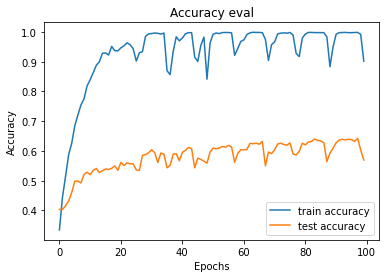

In [12]:
plot_accuracy(history)

In [13]:
# As is seen, overfitting has occurred and this must be adjusted for.
# Regularizing model for managing overfitting
# Using dropout method for managing overfitting, in dropout random neurons will be disabled
# to make it so that neurons do not rely on one another

ann_model_adjusted = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])


In [14]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
ann_model_adjusted.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = ann_model_adjusted.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
173/173 [==============================] - 2s 7ms/step - loss: 21.2521 - accuracy: 0.1772 - val_loss: 3.5703 - val_accuracy: 0.2541
Epoch 2/100
173/173 [==============================] - 1s 6ms/step - loss: 7.2231 - accuracy: 0.2005 - val_loss: 3.3290 - val_accuracy: 0.2207
Epoch 3/100
173/173 [==============================] - 1s 6ms/step - loss: 4.8967 - accuracy: 0.1970 - val_loss: 3.3799 - val_accuracy: 0.2029
Epoch 4/100
173/173 [==============================] - 1s 6ms/step - loss: 4.1229 - accuracy: 0.1939 - val_loss: 3.3806 - val_accuracy: 0.1957
Epoch 5/100
173/173 [==============================] - 1s 6ms/step - loss: 3.7997 - accuracy: 0.2010 - val_loss: 3.3546 - val_accuracy: 0.2067
Epoch 6/100
173/173 [==============================] - 1s 6ms/step - loss: 3.5984 - accuracy: 0.2175 - val_loss: 3.2939 - val_accuracy: 0.2363
Epoch 7/100
173/173 [==============================] - 1s 6ms/step - loss: 3.5304 - accuracy: 0.2201 - val_loss: 3.2645 - val_accuracy: 0.246

Epoch 58/100
173/173 [==============================] - 1s 6ms/step - loss: 1.8300 - accuracy: 0.5762 - val_loss: 1.9954 - val_accuracy: 0.5565
Epoch 59/100
173/173 [==============================] - 1s 6ms/step - loss: 1.7918 - accuracy: 0.5887 - val_loss: 1.9595 - val_accuracy: 0.5595
Epoch 60/100
173/173 [==============================] - 1s 6ms/step - loss: 1.7844 - accuracy: 0.5820 - val_loss: 1.9789 - val_accuracy: 0.5574
Epoch 61/100
173/173 [==============================] - 1s 7ms/step - loss: 1.7368 - accuracy: 0.5916 - val_loss: 1.9846 - val_accuracy: 0.5570
Epoch 62/100
173/173 [==============================] - 1s 6ms/step - loss: 1.7296 - accuracy: 0.5972 - val_loss: 1.9376 - val_accuracy: 0.5523
Epoch 63/100
173/173 [==============================] - 1s 6ms/step - loss: 1.7080 - accuracy: 0.5996 - val_loss: 1.9368 - val_accuracy: 0.5574
Epoch 64/100
173/173 [==============================] - 1s 6ms/step - loss: 1.6715 - accuracy: 0.6121 - val_loss: 1.9385 - val_accuracy:

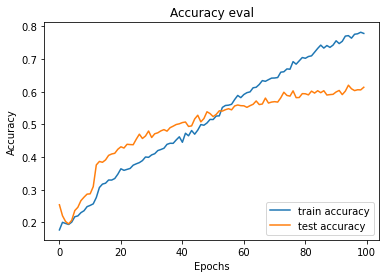

In [16]:
plot_accuracy(history)

In [17]:
#Building Convolutional Neural Network (CNN)

# creating the separate sets for each action (training, testing, validating)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# making sets 2D
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [18]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [19]:
# build the CNN
cnn_model = keras.Sequential()

# 1st conv layer
cnn_model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())

# 2nd conv layer
cnn_model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())

# 3rd conv layer
cnn_model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
cnn_model.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(64, activation='relu'))
cnn_model.add(keras.layers.Dropout(0.3))

# output layer
cnn_model.add(keras.layers.Dense(10, activation='softmax'))

In [20]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = cnn_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

Epoch 1/100
148/148 [==============================] - 4s 21ms/step - loss: 2.3658 - accuracy: 0.2411 - val_loss: 1.9243 - val_accuracy: 0.3395
Epoch 2/100
148/148 [==============================] - 3s 20ms/step - loss: 1.7823 - accuracy: 0.3862 - val_loss: 1.5448 - val_accuracy: 0.4623
Epoch 3/100
148/148 [==============================] - 3s 20ms/step - loss: 1.5449 - accuracy: 0.4523 - val_loss: 1.4192 - val_accuracy: 0.5055
Epoch 4/100
148/148 [==============================] - 3s 20ms/step - loss: 1.4337 - accuracy: 0.4862 - val_loss: 1.3022 - val_accuracy: 0.5292
Epoch 5/100
148/148 [==============================] - 3s 20ms/step - loss: 1.3582 - accuracy: 0.5129 - val_loss: 1.2478 - val_accuracy: 0.5555
Epoch 6/100
148/148 [==============================] - 3s 20ms/step - loss: 1.2807 - accuracy: 0.5360 - val_loss: 1.2081 - val_accuracy: 0.5682
Epoch 7/100
148/148 [==============================] - 3s 20ms/step - loss: 1.2207 - accuracy: 0.5534 - val_loss: 1.1678 - val_accuracy:

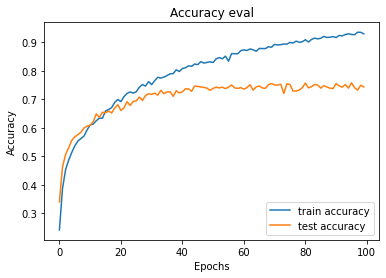

In [22]:
plot_accuracy(history)

In [23]:
# Evaluating model using the test set
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

62/62 - 0s - loss: 0.8414 - accuracy: 0.7483 - 337ms/epoch - 5ms/step

Test accuracy: 0.7483477592468262


In [24]:
cnn_model.save("Genre_Classification_CS_4641")

INFO:tensorflow:Assets written to: Genre_Classification_CS_4641\assets


INFO:tensorflow:Assets written to: Genre_Classification_CS_4641\assets


In [25]:
# Allow model to be reconstructed exactly
cnn_model.save("Genre_Classification_CS_4641.h5")

In [1]:
#To help classify the tracks
genres = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}

In [3]:
#Copied over from the preprocessing file as it will be needed to process playlists
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration 
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):
    start = samples_per_segment * d
    finish = start + samples_per_segment

    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc